In [1]:
from collections import defaultdict
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib
# import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [2]:

column_names = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)', 'Class variable (0 or 1)']
df = pd.read_csv('Pima Indians Diabetes Dataset.csv',names=column_names)
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skinfold thickness (mm)                                           768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [4]:
X = df.drop(['Class variable (0 or 1)'], axis=1).values
X.shape

(768, 8)

In [5]:
y = df['Class variable (0 or 1)'].values
y.shape

(768,)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [7]:
from sklearn.linear_model import LogisticRegressionCV

In [8]:
lr = LogisticRegressionCV(cv=5)

In [9]:
lr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LogisticRegressionCV(cv=5)

In [10]:
y_pred = lr.predict(x_test)

In [11]:
roc_auc_score(y_test, y_pred)

0.7330827067669173

In [12]:
pca = PCA()  
X_transformed = pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

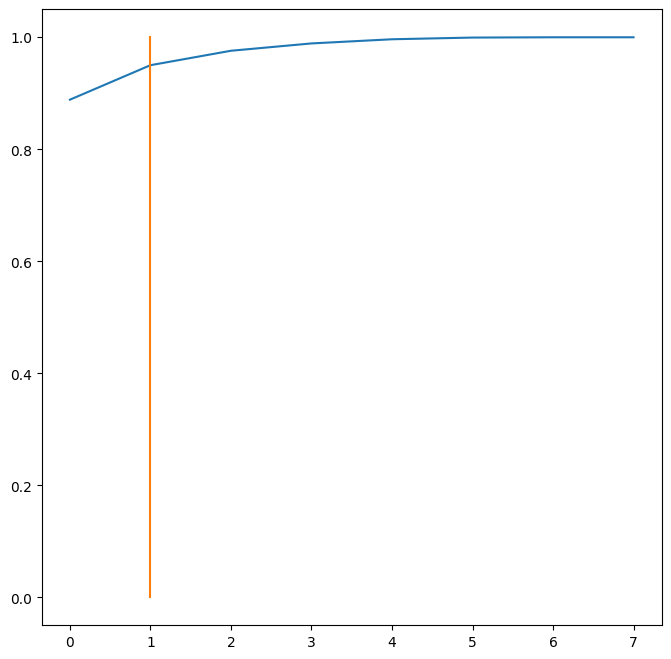

In [13]:
plt.figure(figsize=(8,8))
plt.plot(cumsum)
plt.plot([d-1, d-1], [0, 1])

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

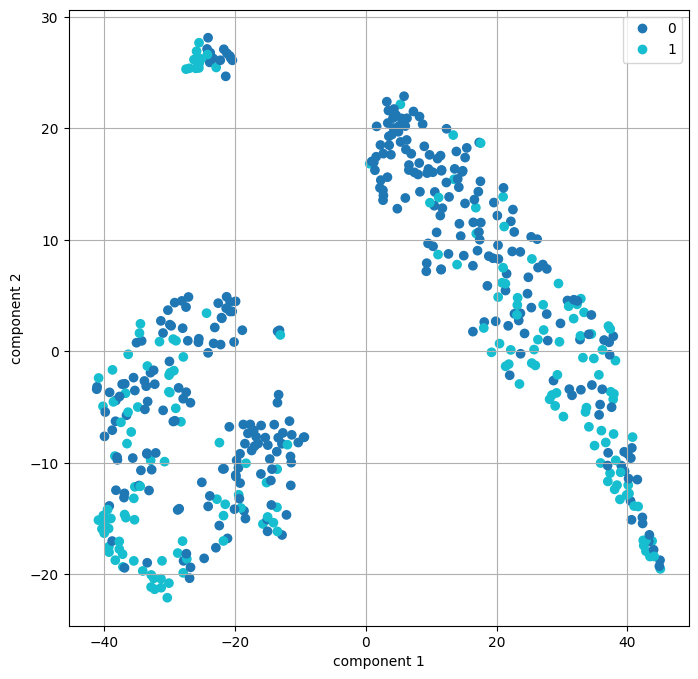

In [15]:
plt.figure(figsize=(8,8))

fig = plt.scatter(
    X_tsne[:, 0][:500], 
    X_tsne[:, 1][:500], 
    c=y[:500], alpha=1,
    cmap=matplotlib.colormaps.get_cmap('tab10'))
plt.xlabel('component 1')
plt.ylabel('component 2')
labels = list(map(str, range(10)))
plt.legend(handles=fig.legend_elements()[0], labels=labels)

plt.grid(True)

In [16]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

In [17]:
lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(x_test))
roc_auc_score(y_test, y_pred)

0.6439312567132116

In [145]:
import time
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier()
t1 = time.time()
lr.fit(X, y)
t2 = time.time()
print(t2 - t1)

0.004069805145263672


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(X)


In [134]:
lr = SGDClassifier()
t1 = time.time()
lr.fit(x_new, y)
t2 = time.time()
print(t2 - t1)

0.0020008087158203125
